# Imports

In [1]:
import numpy as np
import numpy.random as npr
import scipy as scp

# Exercise 1

## Part A

The confusion matrix for the exercise looks like this:

| Proportion  | H0 retained | H0 rejected   |
| :---:       |    :----:   |          :---:|
| H0 true     | TN          | FP (Type I)   |
| H1 true     | FN (Type II)|       TP      |

With the definitions given in the lectures for $\alpha$ and $\beta$, we have that each proportion may be determined by:

$$
TN = n_0 (1-\alpha)\\
FP = \alpha n_0\\
FN = n_1(1-\beta)\\
TP = \beta n_1
$$

Where $n_0$ is the number of hypotheses that are true ($H_0$) and $n_1$ is the number of hypotheses that are false ($H_1$). Then the probability that $H_1$ is true given that $H_0$ is rejected is given by the proportion:

$$ \frac{TP}{TP + FP} $$

In [2]:
def calculateProps(alpha, beta, n0, n1):
    print(f'Calculations with alpha={alpha}, beta={beta}, n0={n0}, n1={n1}')
#     print(f'TN = {n0*(1-alpha)}')
#     print(f'FP = {alpha*n0}')
#     print(f'FN = {n1*(1-beta)}')
#     print(f'TP = {beta*n1}')
    TP = beta*n1
    FP = alpha*n0
    print(f'P(H1|H0 rejected): {TP/(TP+FP)}')

props = [(100, 100), (900, 100)]
betas = [0.8, 0.5, 0.2]

for prop in props:
    for beta in betas:
        calculateProps(0.05, beta, prop[0], prop[1])
calculateProps(0.05, 0.8, 99900, 100)

Calculations with alpha=0.05, beta=0.8, n0=100, n1=100
P(H1|H0 rejected): 0.9411764705882353
Calculations with alpha=0.05, beta=0.5, n0=100, n1=100
P(H1|H0 rejected): 0.9090909090909091
Calculations with alpha=0.05, beta=0.2, n0=100, n1=100
P(H1|H0 rejected): 0.8
Calculations with alpha=0.05, beta=0.8, n0=900, n1=100
P(H1|H0 rejected): 0.64
Calculations with alpha=0.05, beta=0.5, n0=900, n1=100
P(H1|H0 rejected): 0.5263157894736842
Calculations with alpha=0.05, beta=0.2, n0=900, n1=100
P(H1|H0 rejected): 0.3076923076923077
Calculations with alpha=0.05, beta=0.8, n0=99900, n1=100
P(H1|H0 rejected): 0.015763546798029555


## Part B

The probabilities where the populations of true $H_0$ and $H_1$ are similar are high, which is what we would like to see when we reject the null hypothesis. These probabilities also become lower when the power of the test decreases. The definition of power is "the probability that $H_0$ is rejected when $H_0$ is false", so this result is also expected.

However, when we skew the proportion of hypothesis results toward $H_0$ we can see that the probabilities drop drastically. This shows one of the weaknesses of NHST, where if we have underrepresented groups of data we will not get accurate results.

# Exercise 2

## Part A

In [3]:
def waldStat(x, y):
    return ( np.mean(x) - np.mean(y) ) / np.sqrt( np.var(x)/x.size + np.var(y)/y.size )

def waldP(x_lim):
    return 2*(1 - scp.stats.norm.cdf(x_lim))

twain = np.array([.225, .262, .217, .240, .230, .229, .235, .217])
snodgrass = np.array( [.209, .205, .196, .210, .202, .207, .224, .223, .220, .201] )
print( waldStat(twain, snodgrass) )
print(waldP(3.945))

3.9446199162650353
7.979997860951826e-05


The Wald statistic for this test is approximately 3.945. The rejection region is defined by $R = \{|Z| > 3.945\}$, where Z corresponds to the Wald statistic. Thus, the p-value is given by:

$$ P\left( |Z| > 3.945 \right) = 2\cdot P\left(Z > 3.945 \right) = 2 \cdot \left( 1 - P(Z \leq 3.945) \right) = 2\cdot (1 - \Phi(3.945) ) $$

because the distribution of Z is approximately normal with mean 0 and variance 1 for a Wald test. For a normal distribution, this probability is given by:

$$ 2\cdot \left(1 - \int_{-\infty}^{3.945} \frac{1}{\sqrt{2\pi}} e^{ -\frac{x^2}{2} } dx \right) = 2\cdot(1-\Phi(3.945))  \approx 0.0000798 $$

The confidence interval is given by $\overline{X} - \overline{Y} \pm 2\sqrt{ \frac{s_1^2}{8} + \frac{s_2^2}{10} } $

In [4]:
mean_diff = np.mean(twain) - np.mean(snodgrass)
var_metric = 2*np.sqrt( np.var(twain)/twain.size + np.var(snodgrass)/snodgrass.size )
conf_interval = [ mean_diff - var_metric, mean_diff + var_metric]

print(f'X_mean - Y_mean, with X being Twain and Snodgrass Y: {mean_diff}')

print(f'Sample variance metric: {var_metric}')

print(f'Confidence interval: {conf_interval}')

X_mean - Y_mean, with X being Twain and Snodgrass Y: 0.022175
Sample variance metric: 0.011243161810629607
Confidence interval: [0.010931838189370394, 0.03341816181062961]


The p-value indicates that the result is statistically significant, but the confidence interval $(0.1, 0.3)$ is small. Since the confidence interval is so small, you could argue that the authors aren't different people

## Part B


In [5]:
B = 10000
p_val = 1/(B+1)
permute_space = np.concatenate( (twain, snodgrass) )

npr.seed(0)
for i in range(B):
    permute = npr.permutation(permute_space)
    p_val += ( waldStat( permute[:8], permute[8:] ) > 3.945 ) / (B+1)

print(p_val)

0.0008999100089991002


The p-value using permutation testing is almost 10 times bigger than the one calculated in the previous section, so the evidence against the null is weaker.

# Exercise 3

## Part A

The distributions for the drug trials are modeled as Bernoulli, with a success rate $p$. The plug-in estimator for the expected value is $\hat{p} = \frac{successes}{n}$, with n trials. The variance is given by $\hat{p}(1-\hat{p})$

In [6]:
def statisticsEx3(n, nausea):
    drug_no_nausea = n - nausea
    placebo_p = 35 / 80
    drug_p = drug_no_nausea/n
    
    wald = (placebo_p - drug_p) / np.sqrt( placebo_p*(1-placebo_p)/80 + drug_p*(1-drug_p)/n )
    odds_ratio = drug_p / placebo_p
    p_val = waldP( np.abs(wald) )
    return wald, odds_ratio, p_val

drugs_dict = {
    'Chlorpromazine': statisticsEx3(75, 26),
    'Dimenhydrinate': statisticsEx3(85, 52),
    'Pentobarbital100mg' : statisticsEx3(67, 35),
    'Pentobarbital150mg' : statisticsEx3(85, 37),
}

for key in drugs_dict:
    print(f'Drug:{key}, stat={drugs_dict[key][0]}, odds ratio={drugs_dict[key][1]},p-value={drugs_dict[key][2]}')

Drug:Chlorpromazine, stat=-2.7643637780027186, odds ratio=1.4933333333333334,p-value=0.005703391555257786
Drug:Dimenhydrinate, stat=0.6429872617820929, odds ratio=0.8873949579831933,p-value=0.5202323654229468
Drug:Pentobarbital100mg, stat=-0.4864275028950293, odds ratio=1.091684434968017,p-value=0.6266640947313891
Drug:Pentobarbital150mg, stat=-1.6466051393070562, odds ratio=1.2907563025210085,p-value=0.09963923341820236


With a Wald statistic test, we see that for a 5 per cent level the only drug that has a statistically significant value is Chlorpromazine, with a p-value of ~0,006 and an odds ratio of ~1,49. Dimenhydrinate is the only drug that presents an odds ratio smaller than 1, so we can infer that it's the only drug that performed worse than a placebo during this trial.

## Part B

With Bonferroni, we only divide the p-value cutoff by the number of tests realized. In this case, we had 4 tests, so $\frac{\alpha}{4} = \frac{0.05}{4} = 0.0125$. With this new cutoff, the p-value of Chlorpromazine is still statistically significant. The Bonferroni adjustment is also stricter than FDR, so this p-value must also be statistically significant under FDR.

# Exercise 4

## Part A



Distribution with multinomial: [0.1  0.1  0.1  0.15 0.1  0.15 0.25 0.   0.05 0.  ]


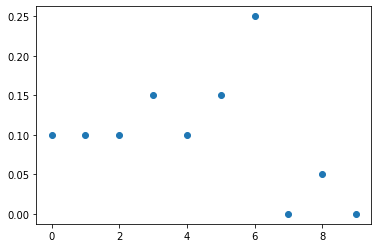

In [9]:
import matplotlib.pyplot as plt
n = 20
seq = np.array([6,3,7,4,6,9,2,6,7,4,3,7,7,2,5,4,1,7,5,1])

p = np.zeros(10)

for j in range(10):
    p[j] = np.sum(seq == j+1) / n

print(f'Distribution with multinomial: {p}')
plt.plot(p, 'o')
plt.show()

## Part B



In [10]:
alpha_priors = [0.1, 1, 10]

for alpha_prior in alpha_priors:
    alphas = np.full(10, alpha_prior)
    estimated_alpha = np.zeros(10)
    for i in range(10):
        estimated_alpha[i] = alphas[i] + np.sum( seq == i+1 )
    alpha_0 = np.sum(estimated_alpha)
    print(f'Distribution with Dirichlet using alpha_i = {alpha_prior}: {estimated_alpha}')
    print(f'Mean estimates using alpha_i={alpha_prior}: {estimated_alpha / alpha_0}\n')
    plt.plot(mean_estimates, 'o')
    plt.show()

Distribution with Dirichlet using alpha_i = 0.1: [2.1 2.1 2.1 3.1 2.1 3.1 5.1 0.1 1.1 0.1]
Mean estimates using alpha_i=0.1: [0.1        0.1        0.1        0.14761905 0.1        0.14761905
 0.24285714 0.0047619  0.05238095 0.0047619 ]



NameError: name 'mean_estimates' is not defined